# Lab 3
### Viraj Bangari
### 2017-01-27

#### Lab Record

- Get inductor with resistance of 26.7 Ω +/- 0.1 Ω

- Set Set BK-Precision 1351 multimeter for measuring to RMS AC Voltage. The accuracy for AC Voltage is +/- 0.5% +/- 2 digits. 

- Set BK-Precision 2831E multimeter for measuring RMS AC Currnet. The accuracy for AC current is +/- 0.75%+/- 2 digits.

- Set BK-Precision 4011 Function Generator to initially create a 200Hz sine wave. Assume negligible frequency.

- Create the following circuit. A is the Ammeter, V is the voltmeter, Z is the inductor
<img src="./img/diagram.png" width="35%">

- Measure the RMS Current and RMS Voltage. Vary the frequencies to the following values, 200, 490, 665, 800, 916, 1020, 1114, 1200 Hz. Record current and voltage.

In [1]:
import pandas as pd
raw_inductor_data = pd.read_csv("./data/part1a.csv")
raw_inductor_data

,Frequency [Hz],Vrms [V],Error in Vrms [V],Irms [mA],Error in Irms [mA],Z [Ohms],Error in Z [Ohms]
0,200,3.02,0.015,97.2,0.073,31.07,0.16
1,490,3.97,0.020,89.5,0.067,44.36,0.23
2,665,4.64,0.023,85.0,0.064,54.59,0.27
3,801,5.06,0.025,80.4,0.060,62.94,0.31
4,916,5.38,0.027,76.5,0.057,70.33,0.36
5,1020,5.63,0.028,73.1,0.055,77.02,0.39
6,1114,5.83,0.029,70.1,0.053,83.17,0.42
7,1200,6.00,0.030,67.5,0.051,88.89,0.45


- Get capicitor with capicitance of 0.454 µF +/- 0.002 µF. Using the same instruments and circuit above, replace the inductor with the capacitor
- Measure the RMS current and RMS voltage using the following frequencies 208, 220, 235, 255, 280, 310, 350, 420, 560, 1200 Hz.

In [2]:
raw_capacitor_data = pd.read_csv("./data/part1b.csv")
raw_capacitor_data

,Frequency [Hz],Vrms [V],Error in Vrms [V],Irms [mA],Error in Irms [mA],Z [Ohms],Error in Z [Ohms]
0,208,7.76,0.039,4.63,0.035,1.676,0.015
1,220,7.76,0.039,4.89,0.037,1.587,0.014
2,235,7.75,0.039,5.23,0.039,1.482,0.013
3,255,7.75,0.039,5.67,0.043,1.367,0.012
4,280,7.74,0.039,6.22,0.047,1.244,0.011
5,310,7.74,0.039,6.87,0.052,1.127,0.010
6,350,7.73,0.039,7.72,0.058,1.001,0.009
7,420,7.71,0.039,9.28,0.070,0.831,0.008
8,560,7.78,0.039,12.48,0.094,0.623,0.006
9,1200,7.69,0.038,26.36,0.020,0.292,0.001


- Set the function generator to 1000 Hz Sine wave.
- Put the inductor and capacitor in parallel
- Measure RMS Current and RMS Voltage using the same instruments. Vary Vrms to get 10 points between the minimum output voltage and the maximumum ouput voltage for the function generator.
- At max voltage, measure Irms across the inductor and capacitor.
    - Inductor:  77.2 mA +/- 0.37 mA
    - Capcitor: 16.8 mA +/- 0.84 mA

In [3]:
raw_parallel_data = pd.read_csv("./data/part2a.csv")
raw_parallel_data

,Vrms [V],Irms [mA]
0,0.52,6.27
1,0.61,7.31
2,0.80,9.40
3,1.47,16.73
4,1.79,20.10
5,3.23,35.20
6,3.82,41.20
7,4.95,52.90
8,5.76,61.30
9,5.85,62.20


- Put the inductor and capacitor in series
- Measure RMS Current and RMS Voltage using the same instruments. Vary Vrms to get 10 points between the minimum output voltage and the maximumum ouput voltage for the function generator.
- At max voltage, measure Vrms across the inductor and capacitor. 
    - Inductor: 1.89 V +/- 0.94 V
    - Capcitor: 9.36 V +/- 0.47 V

In [4]:
raw_series_data = pd.read_csv("./data/part2b.csv")
raw_series_data

,Vrms [V] (+/- 0.75% +/- 2 digs),Irms [mA] (+/- 0.75% +/- 2 digits)
0,0.69,2.44
1,1.01,3.55
2,1.88,6.58
3,3.00,10.50
4,4.03,14.10
5,4.86,17.03
6,5.74,20.15
7,6.40,22.50
8,7.44,26.20
9,7.58,26.70


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
import qexpy as q

def get_uncertainty(data, percent, digits, after_dec):
    error = percent * data
    exp = np.abs(np.floor(np.log10(error)))
    error *= 10**exp
    error = np.round(error, digits - 1)
    error /= 10**after_dec
    return error


def percent_diff(actual, theoretical):
    return 100*abs((actual-theoretical)/theoretical)


def linear_plot(**kwargs):
    plt.figure(figsize=(10,8))
    plt.errorbar(kwargs["xdata"],
                 kwargs["ydata"], 
                 yerr=kwargs["yerr"], 
                 fmt='.', 
                 capsize=3, 
                 label="Experimental Value with Error")
    
    if "lin_label" not in kwargs:
        kwargs["lin_label"] = "Weighted Linear Regression"
        
    plt.plot(kwargs["xdata"], kwargs["slope"] * kwargs["xdata"] + kwargs["intercept"], 
             label=kwargs["lin_label"])
    plt.legend()
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.title(kwargs["title"])
    plt.ylabel(kwargs["ylabel"])
    plt.xlabel(kwargs["xlabel"])
    
    if "annotate" in kwargs:
        plt.annotate(kwargs["annotate"], 
                     xy=kwargs["xy"])
    plt.show()


Loading BokehJS ...

-----------------Fit results-------------------
Fit of  dataset0  to  linear
Fit parameters:
dataset0_linear_fit0_fitpars_intercept = 769 +/- 3,
dataset0_linear_fit0_fitpars_slope = 0.0001259 +/- 0.0000002

Correlation matrix: 
[[ 1.    -0.556]
 [-0.556  1.   ]]

chi2/ndof = 0.55/5
---------------End fit results----------------



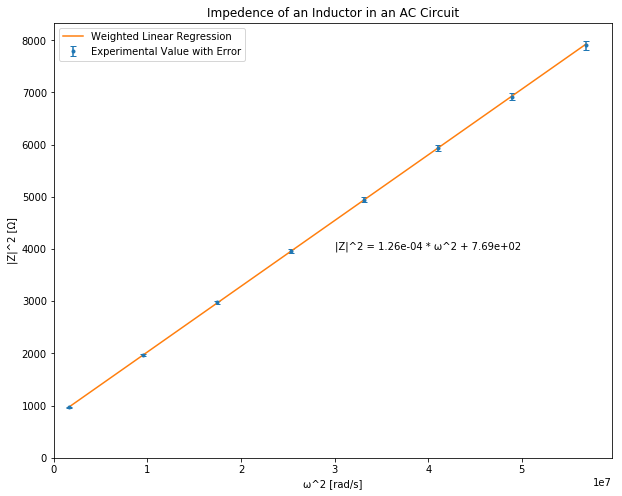

R_L = 2.77e+01 Ω ± 5e-02 Ω percentage diff 3.845617798993977
L = 1.12e-02 H ± 9e-06 H


In [6]:
inductor_data = raw_inductor_data.as_matrix()
freqs_ind = q.MeasurementArray(inductor_data[:, 0])
V_rms_ind = q.MeasurementArray(inductor_data[:, 1], 
                               get_uncertainty(inductor_data[:, 1], 0.5/100, 2, 2))  # volts
I_rms_ind = q.MeasurementArray(inductor_data[:, 3], 
                               get_uncertainty(inductor_data[:, 2], 0.75/100, 2, 2))  # milliamps

w_sq_ind = (2 * pi * freqs_ind)**2
Z_sq_ind = (V_rms_ind/I_rms_ind)**2 * 1000**2

R_sq_ind, L_sq = q.XYDataSet(w_sq_ind.get_means(), 
                             Z_sq_ind.get_means(), 
                             yerr=Z_sq_ind.get_stds()).fit("linear")

linear_plot(xdata=w_sq_ind.get_means(),
            ydata=Z_sq_ind.get_means(),
            yerr=Z_sq_ind.get_stds(),
            slope=L_sq.mean,
            intercept=R_sq_ind.mean,
            title="Impedence of an Inductor in an AC Circuit",
            xlabel="⍵^2 [rad/s]",
            ylabel="|Z|^2 [Ω]",
            annotate="|Z|^2 = {:.2e} * ⍵^2 + {:.2e}".format(L_sq.mean, R_sq_ind.mean),
            xy=(3e7, 4000))

R_ind = q.sqrt(R_sq_ind)
L = q.sqrt(L_sq)
print("R_L = {:.2e} Ω ± {:.0e} Ω".format(R_ind.mean, R_ind.std), "percentage diff", percent_diff(R_ind.mean, 26.7))
print("L = {:.2e} H ± {:.0e} H".format(L.mean, L.std))

-----------------Fit results-------------------
Fit of  dataset1  to  linear
Fit parameters:
dataset1_linear_fit0_fitpars_intercept = 0.0006 +/- 0.0003,
dataset1_linear_fit0_fitpars_slope = 4806000 +/- 7000

Correlation matrix: 
[[ 1.    -0.572]
 [-0.572  1.   ]]

chi2/ndof = 0.62/7
---------------End fit results----------------



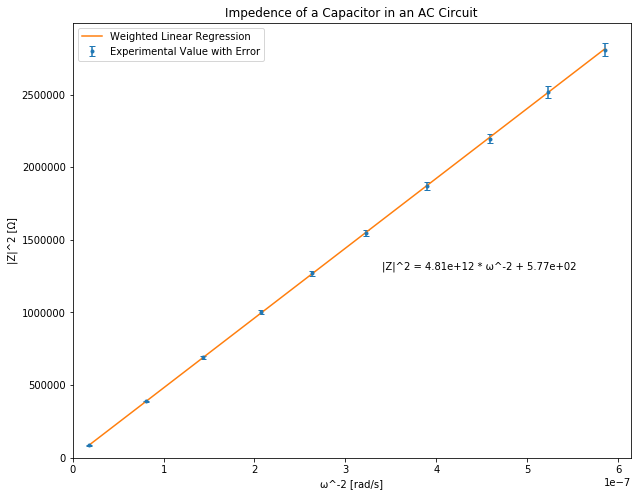

$R_C = 2.40e+01 \Omega \pm 6e+00 \Omega$
$C = 4.56e-07 F \pm 3e-10 F$ 0.47266049147422895


/usr/local/lib/python3.6/site-packages/qexpy/error_operations.py:386: RuntimeWarning: invalid value encountered in sqrt
  result = _np_func[func](*value)


In [7]:
capacitor_data = raw_capacitor_data.as_matrix()
freqs_cap = q.MeasurementArray(capacitor_data[:, 0])
V_rms_cap = q.MeasurementArray(capacitor_data[:, 1], 
                               get_uncertainty(capacitor_data[:, 1], 0.5/100, 2, 2))
I_rms_cap = q.MeasurementArray(capacitor_data[:, 3], 
                               get_uncertainty(capacitor_data[:, 2], 0.75/100, 2, 2)) # milliamps

w_inv_sq_cap = (2 * pi * freqs_cap)**-2
Z_sq_cap = (V_rms_cap/I_rms_cap)**2

R_temp, C_temp = q.XYDataSet(xdata=w_inv_sq_cap.get_means(), 
                             ydata=Z_sq_cap.get_means(), 
                             yerr=Z_sq_cap.get_stds()).fit("linear")

R_sq_cap = R_temp * 1000 ** 2
C_inv_sq = C_temp * 1000 ** 2

linear_plot(xdata=w_inv_sq_cap.get_means(),
            ydata=Z_sq_cap.get_means() * 1000 ** 2,
            yerr=Z_sq_cap.get_stds() * 1000 ** 2,
            slope=C_inv_sq.mean,
            intercept=R_sq_cap.mean,
            title="Impedence of a Capacitor in an AC Circuit",
            xlabel="⍵^-2 [rad/s]",
            ylabel="|Z|^2 [Ω]",
            annotate="|Z|^2 = {:.2e} * ⍵^-2 + {:.2e}".format(C_inv_sq.mean, R_sq_cap.mean),
            xy=(3.4e-7, 1300000))

R_cap = q.sqrt(R_sq_cap)
C = 1/q.sqrt(C_inv_sq)
print("$R_C = {:.2e} \Omega \pm {:.0e} \Omega$".format(R_cap.mean, R_cap.std))
print("$C = {:.2e} F \pm {:.0e} F$".format(C.mean, C.std), percent_diff(C.mean, 4.54e-7))

-----------------Fit results-------------------
Fit of  dataset2  to  linear
Fit parameters:
dataset2_linear_fit0_fitpars_intercept = -0.10 +/- 0.01,
dataset2_linear_fit0_fitpars_slope = 95.3 +/- 0.3

Correlation matrix: 
[[ 1.    -0.891]
 [-0.891  1.   ]]

chi2/ndof = 4.69/7
---------------End fit results----------------



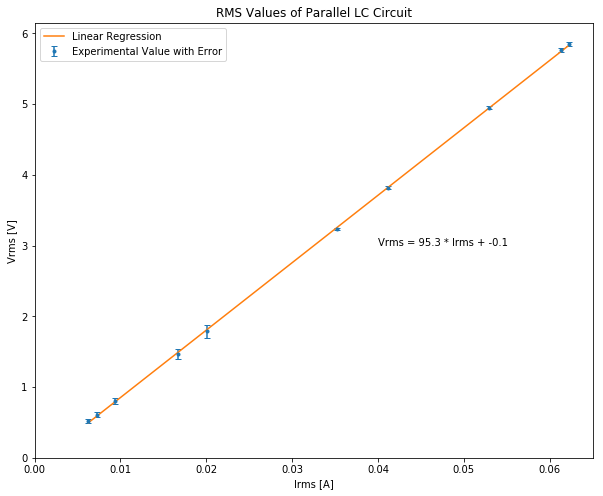

|Z| parallel = 9.533e+01 Ω ± 3e-01 Ω


In [8]:
from scipy.stats import linregress

parallel_data = raw_parallel_data.as_matrix()
V_rms_par = q.MeasurementArray(parallel_data[:, 0], 
                               get_uncertainty(parallel_data[:, 0], 0.5/100, 2, 2))
I_rms_par = q.MeasurementArray(parallel_data[:, 1]/1000, 
                               get_uncertainty(parallel_data[:, 1]/1000, 0.5/100, 2, 2)) # milliamps

Z_err, Z_mag = q.XYDataSet(xdata=I_rms_par.get_means(), 
                           ydata=V_rms_par.get_means(), 
                           yerr=V_rms_par.get_stds()).fit("linear")

linear_plot(xdata=I_rms_par.get_means(),
            ydata=V_rms_par.get_means(),
            yerr=V_rms_par.get_stds(),
            slope=Z_mag.mean,
            intercept=Z_err.mean,
            title="RMS Values of Parallel LC Circuit",
            xlabel="Irms [A]",
            ylabel="Vrms [V]",
            lin_label="Linear Regression",
            annotate="Vrms = {:.1f} * Irms + {:.1f}".format(Z_mag.mean, Z_err.mean),
            xy=(0.04, 3))

print("|Z| parallel = {:.3e} Ω ± {:.0e} Ω".format(Z_mag.mean, Z_mag.std))

-----------------Fit results-------------------
Fit of  dataset3  to  linear
Fit parameters:
dataset3_linear_fit0_fitpars_intercept = 0.018 +/- 0.008,
dataset3_linear_fit0_fitpars_slope = 283.8 +/- 0.5

Correlation matrix: 
[[ 1.    -0.915]
 [-0.915  1.   ]]

chi2/ndof = 1.21/7
---------------End fit results----------------



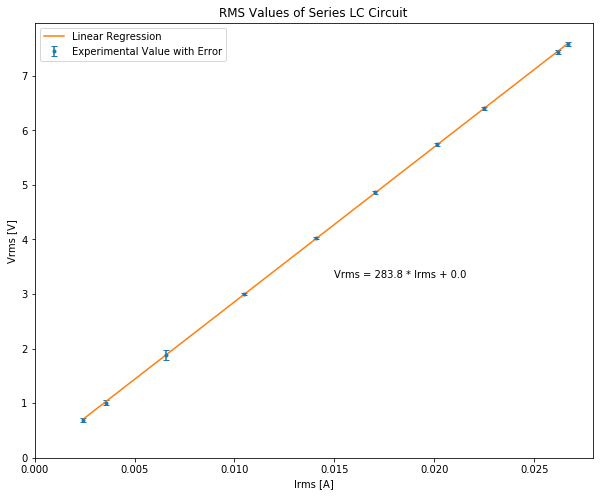

|Z| series = 2.838e+02 Ω ± 5e-01 Ω


In [9]:
series_data = raw_series_data.as_matrix()
V_rms_ser = q.MeasurementArray(series_data[:, 0], 
                               get_uncertainty(series_data[:, 0], 0.5/100, 2, 2))
I_rms_ser = q.MeasurementArray(series_data[:, 1]/1000, 
                               get_uncertainty(series_data[:, 1]/1000, 0.5/100, 2, 2)) # milliamps

Z_err_ser, Z_mag_ser = q.XYDataSet(xdata=I_rms_ser.get_means(), 
                                   ydata=V_rms_ser.get_means(), 
                                   yerr=V_rms_ser.get_stds()).fit("linear")

linear_plot(xdata=I_rms_ser.get_means(),
            ydata=V_rms_ser.get_means(),
            yerr=V_rms_ser.get_stds(),
            slope=Z_mag_ser.mean,
            intercept=Z_err_ser.mean,
            title="RMS Values of Series LC Circuit",
            xlabel="Irms [A]",
            ylabel="Vrms [V]",
            lin_label="Linear Regression",
            annotate="Vrms = {:.1f} * Irms + {:.1f}".format(Z_mag_ser.mean, Z_err_ser.mean),
            xy=(0.015, 3.3))

print("|Z| series = {:.3e} Ω ± {:.0e} Ω".format(Z_mag_ser.mean, Z_mag_ser.std))

In [24]:
## Part C
from sympy.abc import j
test_freq = 1000 #Hz
omega = test_freq * 2 * pi

Z_L = R_ind +  1 * omega * L
Z_C = 1/(1 * omega * C)

# Z_series = abs(Z_L + Z_C)
# Z_parallel = abs((1/Z_L + 1/Z_C)**-1)
# print("|Z| parallel = {:.2e}".format(Z_parallel.mean), "percentage diff", percent_diff(Z_parallel, Z_mag.mean))
# print("|Z| series = {:.2e}".format(Z_series.mean), "percentage diff", percent_diff(Z_series, Z_mag_ser.mean))

98.22 +/- 0.05
348.9 +/- 0.2


In [ ]:
## Part D: Parallel
# Inductor: 77.2 mA +/- 0.37 ,A
# Capcitor: 16.8 mA +/- 0.84 mA
V_RMS = V_rms_par[-1].mean
IL = V_RMS/abs(Z_L)
IC = V_RMS/abs(Z_C)

IL_measured = 77.2e-3
IC_measured = 16.8e-3


print("IL =", IL, "percentage diff", percent_diff(IL, IL_measured))
print("IC =", IC, "percentage diff", percent_diff(IC, IC_measured))

In [ ]:
I_RMS = I_rms_ser[-1].mean
VL = I_RMS * abs(Z_L)
VC = I_RMS * abs(Z_C)

VL_measured = 1.89
VC_measured = 9.36

print("VL =", VL, "percentage diff", percent_diff(VL, VL_measured))
print("VC =", VC, "percentage diff", percent_diff(VC, VC_measured))